# EDA

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(style='ggplot')

In [25]:
def parse_fasta_file(file_path):
    """
    Parse a FASTA file and return sequences and labels.
    """
    sequences, labels = [], []
    current_sequence = ""
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_sequence:
                    sequences.append(current_sequence)
                    current_sequence = ""
                label = line.split()[-1]
                binary_label = 1 if label == "A-0" else 0
                labels.append(binary_label)
            else:
                current_sequence += line
        if current_sequence:
            sequences.append(current_sequence)
    return sequences, labels

## Sequence Lengths

### Train Set

In [26]:
from sklearn.model_selection import train_test_split
import random
import torch

In [27]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [28]:
train_sequences, train_labels = parse_fasta_file('data/train_dataset.fasta')
train_df = pd.DataFrame({'sequence': train_sequences, 'label': train_labels})

In [29]:
filtered_train_df = train_df[train_df['sequence'].apply(len) <= 556]

In [30]:
filtered_train_df

,sequence,label
0,MSDHRAITLEGTTVMVPVYNSTAQQSPYQLTTTADGGVALHHQGEL...,1
1,MALIIAGERSGVGKTTTTLTLLAALKARQASVQSFKVGPDYIDPMF...,1
2,MTMATINARIDDDIKNQADEVLKLMNISQTQAIAAFYQYITEQKKL...,1
3,MTLSKQLNTYITERFKLNYQETWACETVDAMAEDVLPEKYIKNSPL...,1
4,MKRVLVLGATGRTGSFVIKELSKYKSIQLIAGLRSQKDKERLPKIN...,1
...,...,...
70026,HGVQAQLQSRFVKIEDETFSATRLITKAEFAKRTFGNSDLETLKQV...,0
70027,HGWVTDPPSRQALCASGETSFDCGQISYEPQSVEAPKGATTCSGGN...,0
70028,HGYIAKPAPSWKASKTNNWVVEIEPQWKGGWDESKGDEGLLATFKE...,0
70029,HGYVSAVENGVAEGRVTLCKFAANGTGEKNTHCGAIQYEPQSVEGP...,0


In [31]:
train_df1, train_df2 = train_test_split(filtered_train_df, test_size=0.06, stratify=filtered_train_df['label'], random_state=seed)

In [34]:
train_df2

,sequence,label
5379,MSRTVIRAQPFFLQAAPGSREQLANPRGFTTFVLEASWSTGLRLDT...,1
17890,MSSHELPFLILNLAVEMIFVLNSRLHAQAVPPERAASVLRDIGTNI...,1
56401,MEMSLEEFKTMFKTVMKKEFEDELHRITEPGKSKMAIERYIQGINL...,0
57498,DQNQDWNQPIAVVLHPINADGLQTTQAYIHQLQNTDFQALKSYLSE...,0
68833,SHMPKEEVVKELEKILEQLKELIKERPTQLGEEIKKVIEHGKEVKK...,0
...,...,...
60263,MMFVRLSYHSFDYLFNLFDAGVIDLNTKCPVSLSEIEDYDNFGWLE...,0
23661,MDFKTYQKQARLTAQYPNLGSNNIYPTLGLVGEAGEVAEKVKKVIR...,1
9424,GPGSMDLNLIQAFVDIVDAGNLAEAGRRRGVTRSQVSRQLRELEIQ...,1
63780,GPGSAGRQEEIAEEVARLLAGVLYLEPDRLDPEETFLTLGVDSILG...,0


In [36]:
len(train_df2['sequence'].values[0])

395

In [32]:
train_df2['label'].value_counts()

label
0    2356
1    1426
Name: count, dtype: int64

In [33]:
# Save the to CSV
train_df2.to_csv('data/train_sample.csv', index=False)

In [89]:
train_df['sequence_length'] = train_df['sequence'].apply(len)
train_df['sequence_length'].describe()

count    70031.000000
mean       296.768674
std        227.740638
min         25.000000
25%        145.000000
50%        239.000000
75%        376.000000
max       2500.000000
Name: sequence_length, dtype: float64

In [90]:
train_df['label'].value_counts()

label
0    42450
1    27581
Name: count, dtype: int64

### Validation Set

In [91]:
val_sequences, val_labels = parse_fasta_file('data/validation_dataset.fasta')
val_df = pd.DataFrame({'sequence': val_sequences, 'label': val_labels})

In [92]:
val_df['sequence_length'] = val_df['sequence'].apply(len)
val_df['sequence_length'].describe()

count    4000.000000
mean      301.970250
std       229.418199
min        25.000000
25%       151.000000
50%       240.000000
75%       386.000000
max      2413.000000
Name: sequence_length, dtype: float64

In [93]:
val_df['label'].value_counts()

label
1    2000
0    2000
Name: count, dtype: int64

In [94]:
filtered_val_df = val_df[val_df['sequence_length'] <= 556]
filtered_val_df['sequence_length'].describe()

count    3576.000000
mean      242.428971
std       125.684389
min        25.000000
25%       142.000000
50%       221.000000
75%       327.250000
max       556.000000
Name: sequence_length, dtype: float64

In [95]:
filtered_val_df['label'].value_counts()

label
0    1874
1    1702
Name: count, dtype: int64

### Test Set

In [96]:
test_sequences, test_labels = parse_fasta_file('data/test_dataset.fasta')
test_df = pd.DataFrame({'sequence': test_sequences, 'label': test_labels})

In [97]:
test_df.values[395:405]

array([['MSTSLLFEQLNFLILVAAEAELPIAHSTRKLLMDNSCNNCQIYELYNENLKDVKTDKDWFMNKFGPQTVHFVISNTINFPFYKIVYFDLLIPVVSHTWVQDSVKTKRHLRTNMYSPNPFHLLRDCQVYISKSSFNKCEYILYSDLLHLLGGTLVNYISNRTTHVIVQSPQDPIIATVSKLTFGSFSSSSTNKHTEKPLREWKFVYPIWILYHFKMAKPLKGELATLCELDMQDTSEEQLFAKWEEVIGDKQTSSSQLTLHPNKTLFKNHHFAISPDLNFFTPLYWFLKGFIEDLDGKVTPLSFSDDLKSVYQAFPDIDCYIGHSANSPILEKTKSIKPEIHVGNVSWLFYMFALQKFTPVSQCKLIHQPFHAKLFTSKELTVAYTNYFGSQRFYIQRLVEILGGLSTPELTRKNTHLITKSTIGKKFKVAKKWSLDPQNAIIVTNHMWLEQCYMNNSKLNPKDSRFQNFKLDDNMGWNIGQIGMDHSSLPTPKNLSMVTYDTQSISEKPPPTN',
        0],
       ['GPPDLGTDDDDKAMADIASDFPNNKETGEALLTPVDATASSHDGNGPDRLIDQDLTTRWSSAGDGEWAMLDYGSVQEFDAVQASFSKGNERQSKFDIQVSVDGETWTTVLENQLSSGKAIGLERFQFEPAVKARYVRYVGHGNTKNGWNSVTGLAAVNCSINACPASQIITSDVVAAEAVLIAEMKAAEKARKAARKDLRSGNFGVAAVYPCETSVKCDTRSALPVPTGLPATPVAGNAPSENFDMTHWYLSQPFDHDKNGKPDDVSEWNLANGYQHPEIFYTADDGGLVFKSYVKGVRTSKNTKYARTELREMMRRGDQSISTKGVNKNNWVFSSAPEADLEAAAGIDGVLEATLKIDHATTTGNANEVGRFIIGQIHDQNDEPIRLYYRKLPNQPTGAVYFAHESQDATKEDFYPLVGDMTAEVGEDGIALGEVFSYRIDVKGNTMTVTLMR

In [98]:
test_df['sequence_length'] = test_df['sequence'].apply(len)
test_df['sequence_length'].describe()

count    4000.000000
mean      251.482250
std       219.142459
min        15.000000
25%       113.000000
50%       182.000000
75%       316.000000
max      2128.000000
Name: sequence_length, dtype: float64

In [99]:
test_df['label'].value_counts()

label
1    2000
0    2000
Name: count, dtype: int64

In [100]:
filtered_test_df = test_df[test_df['sequence_length'] <= 556]
filtered_test_df['sequence_length'].describe()

count    3663.000000
mean      201.173628
std       120.655066
min        15.000000
25%       109.000000
50%       166.000000
75%       272.000000
max       556.000000
Name: sequence_length, dtype: float64

In [101]:
filtered_test_df['label'].value_counts()

label
0    1925
1    1738
Name: count, dtype: int64

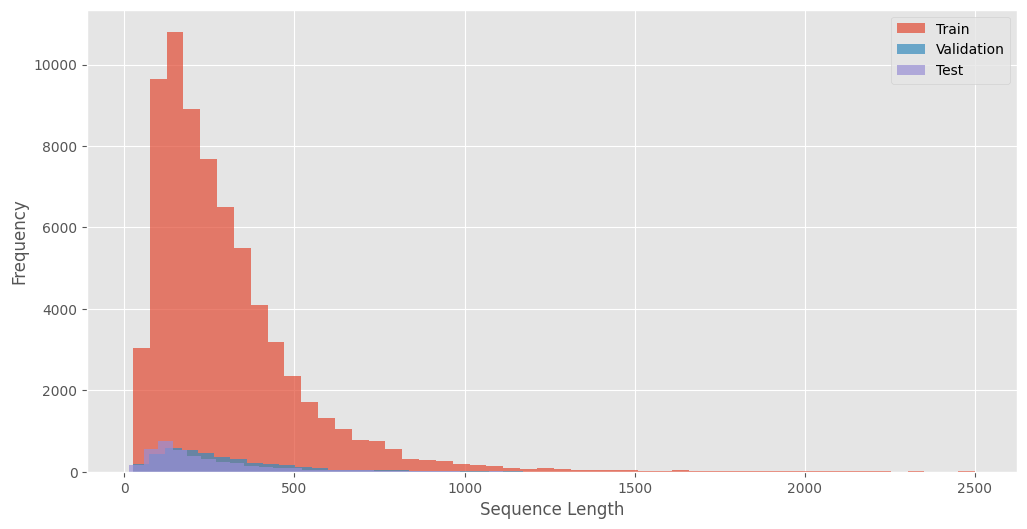

In [102]:
# Plot sequence length distribution
plt.figure(figsize=(12, 6))
plt.hist(train_df['sequence_length'], bins=50, alpha=0.7, label='Train')
plt.hist(val_df['sequence_length'], bins=50, alpha=0.7, label='Validation')
plt.hist(test_df['sequence_length'], bins=50, alpha=0.7, label='Test')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [103]:
# Concatenate all dataframes
all_df = pd.concat([train_df, val_df, test_df])
print(all_df.shape)

# Count sequences longer than x
n = 712
long_sequences_count = all_df[all_df['sequence_length'] > n].shape[0]
print(f"Number of sequences longer than {n}: {long_sequences_count}")
print(f"Percentage of sequences longer than {n}: {long_sequences_count / all_df.shape[0] * 100:.2f}%")

(78031, 3)
Number of sequences longer than 712: 3895
Percentage of sequences longer than 712: 4.99%


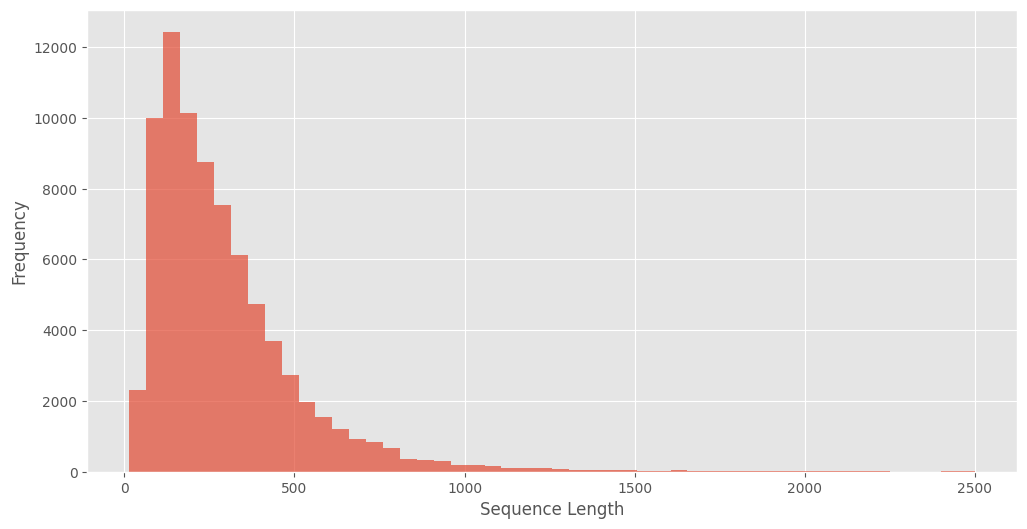

In [104]:
# Plot sequence length distribution
plt.figure(figsize=(12, 6))
plt.hist(all_df['sequence_length'], bins=50, alpha=0.7)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [105]:
all_df['sequence_length'].describe()

count    78031.000000
mean       294.713857
std        227.616232
min         15.000000
25%        143.000000
50%        236.000000
75%        374.000000
max       2500.000000
Name: sequence_length, dtype: float64

In [106]:
percentile_90 = all_df['sequence_length'].quantile(0.90)
print(f"The 90th percentile of the sequence length is: {percentile_90}")

The 90th percentile of the sequence length is: 556.0


In [107]:
# Filter sequences with length between 700 and 720
filtered_sequences = all_df[(all_df['sequence_length'] >= 556) & (all_df['sequence_length'] <= 556)]

filtered_sequences
print(filtered_sequences['sequence'].values[0])

MARAGNLAGRRMRKARAAGALTLVGALALAACSGGGGDTNADGEAAELECSSEAVADQPWKAAEPREFSLLWTDWADYPITDTWEFFDEIEKRTNVKLKLTNIPFSDATEKRSLLISAGDAPQIIPLVYTGEERQFAASGAVVPLSDYIDYMPNFKKYTEEWDLVDMVDDLRQEDGKYYMTPGLQEVSVPVFTLIIRKDVFDEVGAPEPDTWEDLQEGLALIKEKYPDSYPLADGFEAWSMINYAAHAFGTVGGWGFGDGAWWDEEKGEFVYAATTDGYKDMVTYFRGLHDAGLLDAESFTASNDGGGTVVEKVAAEKVFAFSGGSWTVQEFGTALEAAGVTDYELVQIAPPAGPAGNNVEPRNFWNGFMLTADAAKDENFCDLLHFTDWLYYNPEARELIQWGVEGKHFTKEGGKYTLNPEFSLKNLNMNPDAPVDLKKDLGYANDVFAGSTESRELKESYNVPAFVQYIDDVQTKREPREPFPPHPLDEAELEQSSLLGTPLKDTVDTATLEFILGQRPLSDWDAYVAQLEGQGLQSYMDLINGAYKRAAEGQD
